In [199]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [200]:
import math
import numpy as np

In [201]:
df = pd.read_csv("forestfires.csv")

In [202]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

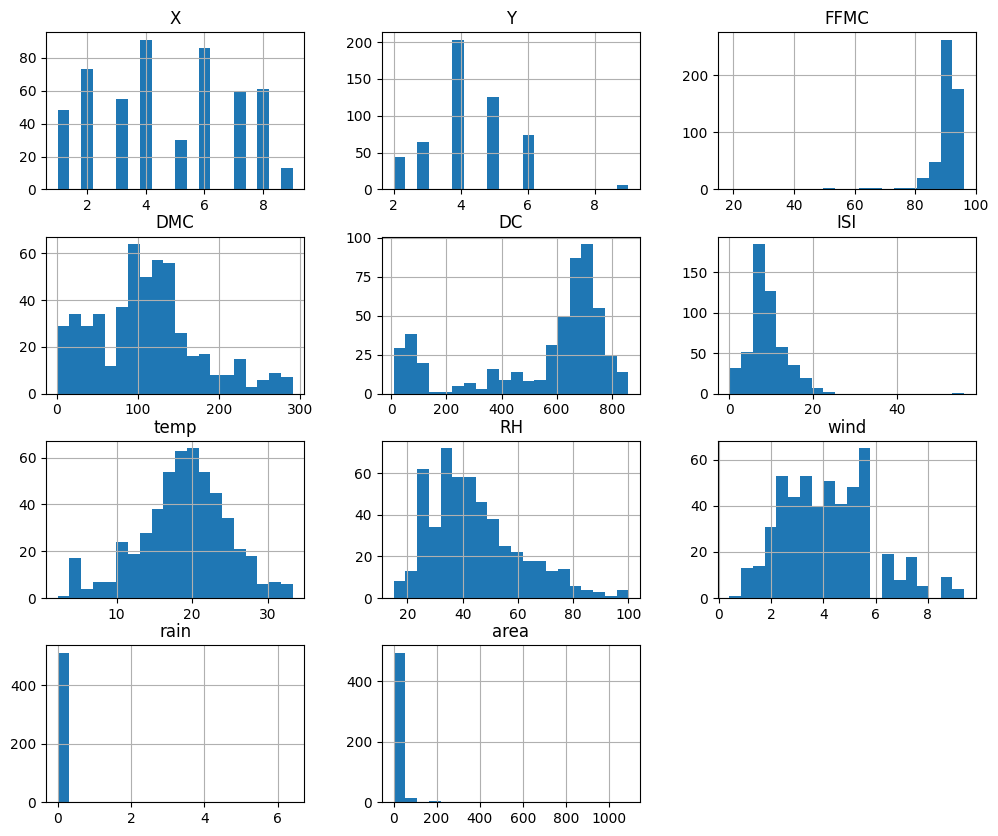

In [203]:
df.hist(figsize=(12,10), bins=20)

In [204]:
df = df.drop(columns=['rain'])
df.drop(columns=['X','Y'], inplace=True)

Transformation de month et day en season et isWeekend

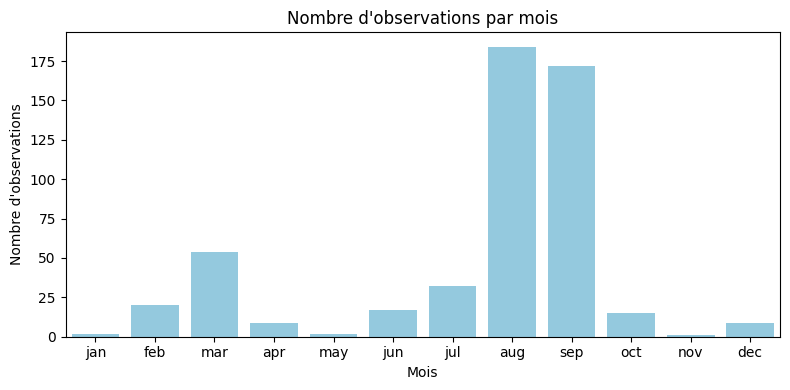

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ordre correct des mois (anglais)
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']


# 1) Distribution d'observations par mois
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='month',           # ta vraie colonne
    order=month_order,   # ordre fixe
    color='skyblue'
)
plt.title("Nombre d'observations par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'observations")
plt.tight_layout()
plt.show()


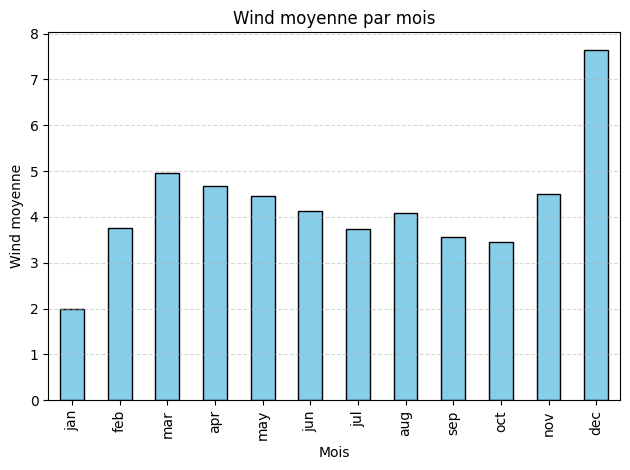

In [206]:
monthly_mean_wind = df.groupby('month')['wind'].mean().reindex(month_order)

# Histogramme (bar plot)
monthly_mean_wind.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Wind moyenne par mois')
plt.xlabel('Mois')
plt.ylabel('Wind moyenne')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


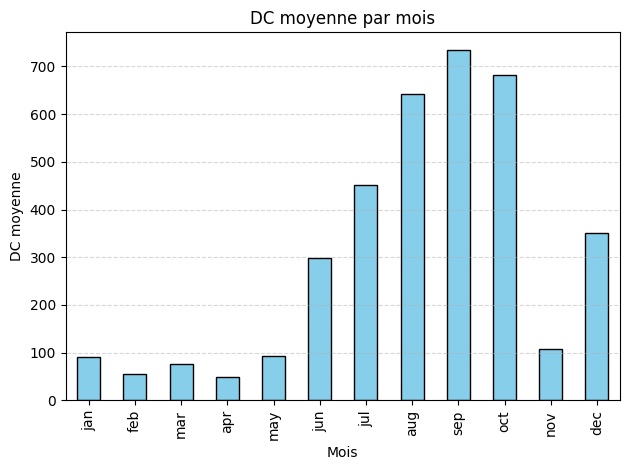

In [207]:
monthly_mean_DC = df.groupby('month')['DC'].mean().reindex(month_order)

# Histogramme (bar plot)
monthly_mean_DC.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('DC moyenne par mois')
plt.xlabel('Mois')
plt.ylabel('DC moyenne')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


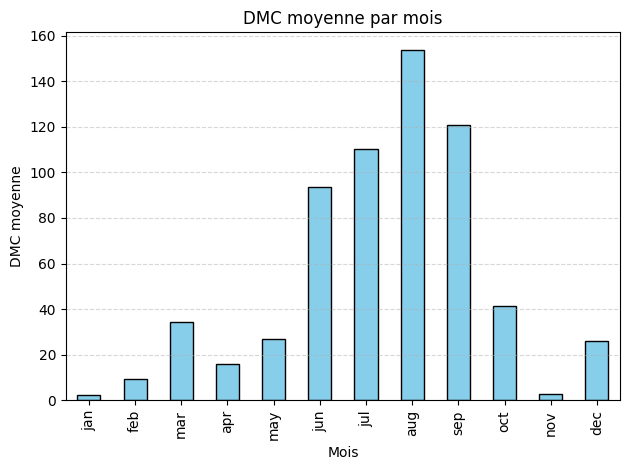

In [208]:
monthly_mean_DMC = df.groupby('month')['DMC'].mean().reindex(month_order)

# Histogramme (bar plot)
monthly_mean_DMC.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('DMC moyenne par mois')
plt.xlabel('Mois')
plt.ylabel('DMC moyenne')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [209]:
# Transformation month → season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
def day_to_is_weekend(day):
    if day in [6, 7]:
        return 1
    else:
        return 0


In [210]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.00
...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,6.44
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,54.29
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,11.16
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.00


In [211]:
day_to_num = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5,
    'sat': 6, 'sun': 7
}

df['day'] = df['day'].map(day_to_num)

month_to_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_to_num)

In [212]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.00
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.00
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.00
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.00
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.00
...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,6.44
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,54.29
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,11.16
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.00


In [213]:
df['season'] = df['month'].apply(month_to_season)
df = df.drop(columns=['month'])
df['is_weekend'] = df['day'].apply(day_to_is_weekend)
df = df.drop(columns=['day'])

In [214]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,area,season,is_weekend
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.00,Spring,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.00,Autumn,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.00,Autumn,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.00,Spring,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.00,Spring,1
...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,6.44,Summer,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,54.29,Summer,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,11.16,Summer,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.00,Summer,1


BOXPLOTS

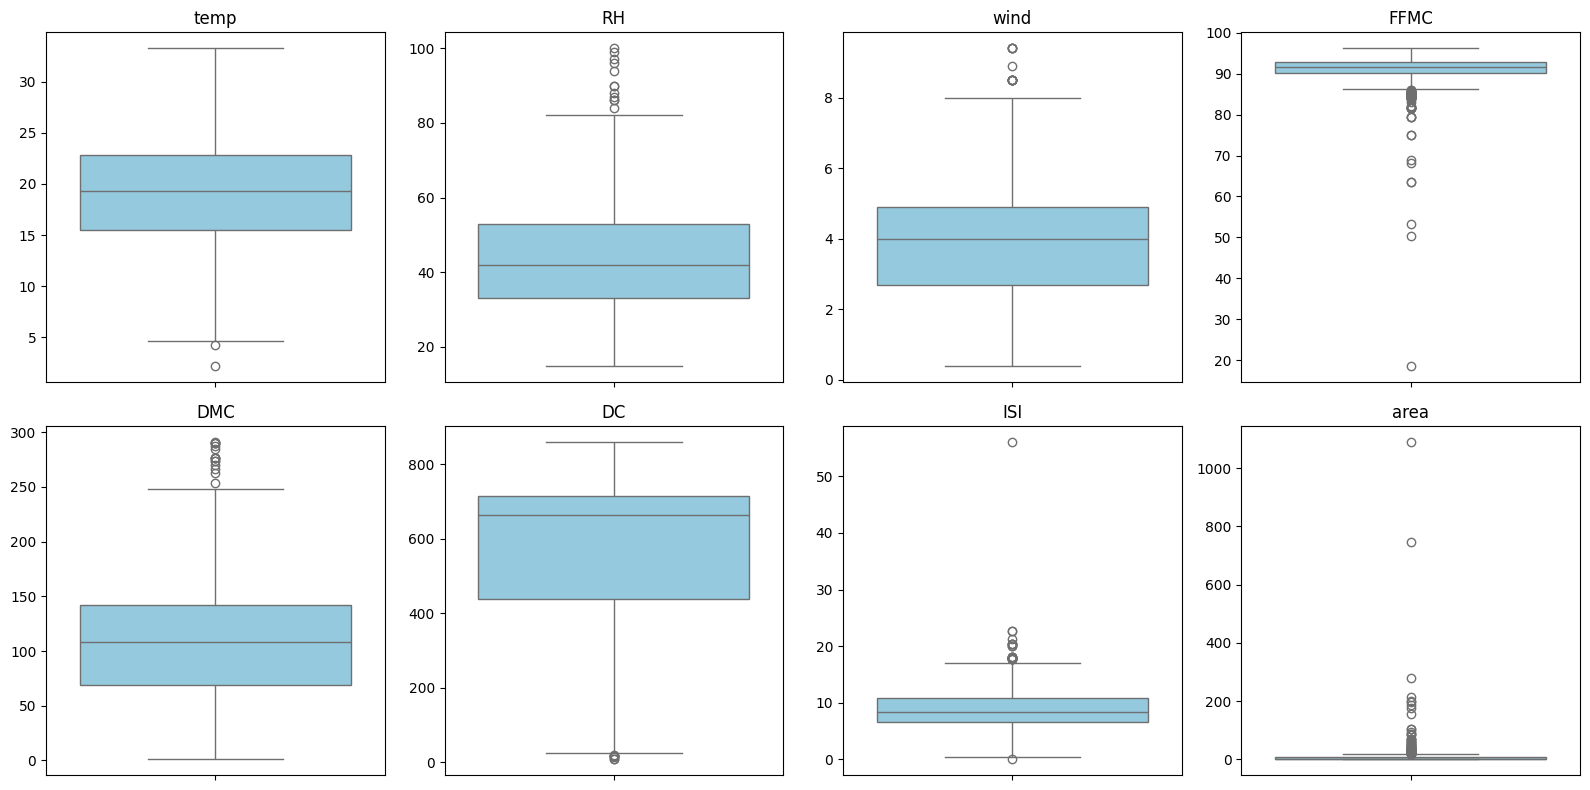

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['temp','RH','wind','FFMC','DMC','DC','ISI','area']

# Crée la grille de subplots (2 lignes, 4 colonnes ici)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

# Aplatir les axes pour pouvoir les parcourir facilement
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')  # optionnel
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


on doit faire une transformationsur area vue que son intervalle de variance est petit et ça représente une variable importante de notre probleme

application de sqrt

In [216]:
df_sqrt = df
df_sqrt['area'] = df_sqrt['area'].apply(lambda x: math.sqrt(x+1))

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'is_weekend'}>]], dtype=object)

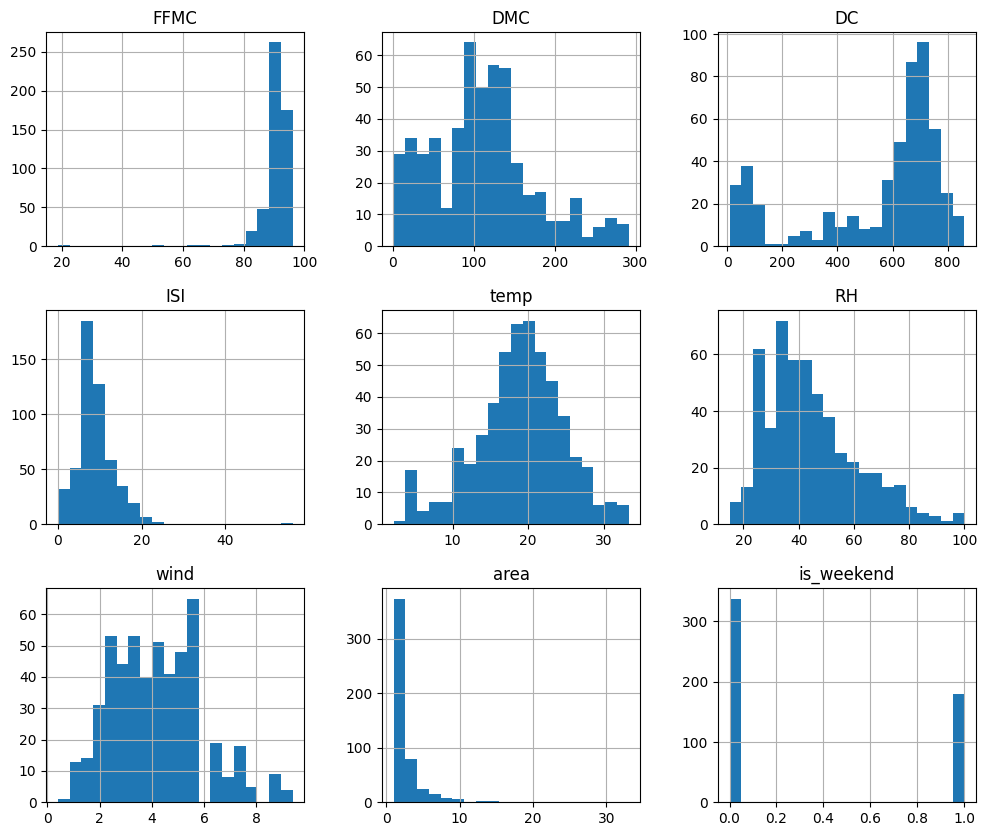

In [217]:
df_sqrt.hist(figsize=(12,10), bins=20)

In [218]:
df_log = df
df_log['area'] = df_log['area'].apply(lambda x: math.log(x+1))

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'is_weekend'}>]], dtype=object)

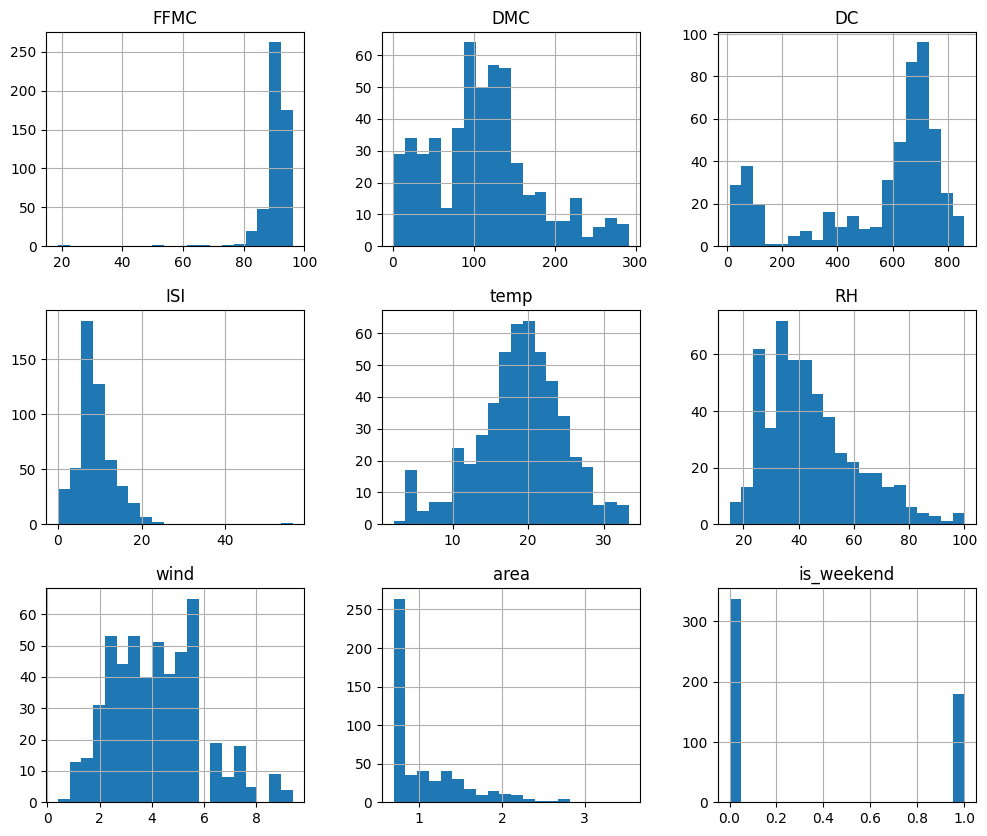

In [219]:
df_log.hist(figsize=(12,10), bins=20)

on choisit la transformation de log

In [220]:
df= df_log

In [221]:
df = pd.get_dummies(df, columns=['season'], drop_first=False)

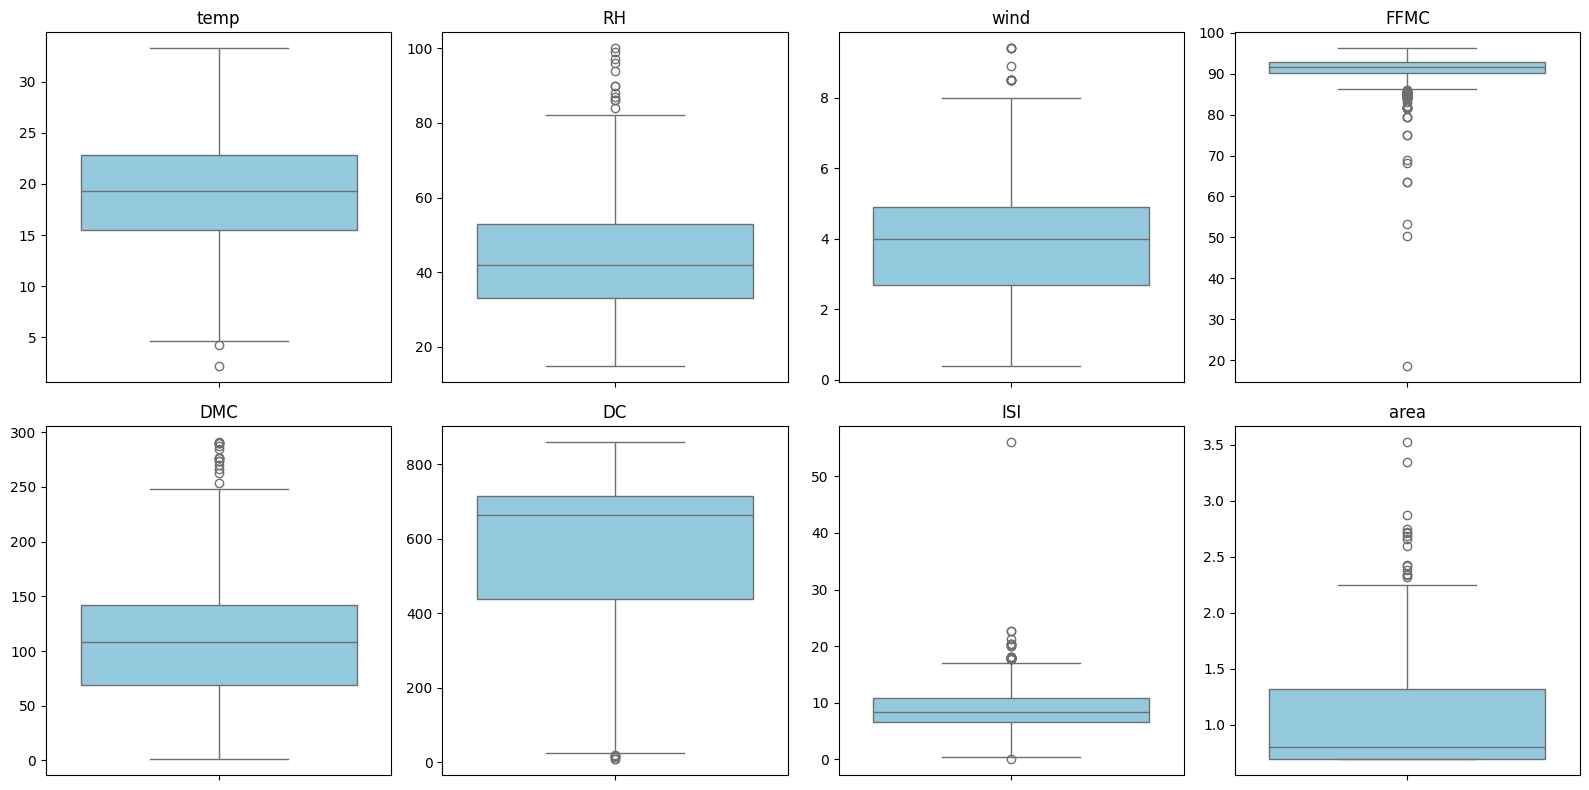

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['temp','RH','wind','FFMC','DMC','DC','ISI','area']

# Crée la grille de subplots (2 lignes, 4 colonnes ici)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

# Aplatir les axes pour pouvoir les parcourir facilement
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


on remarque y a les outliers, on les enlèves

In [223]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

cols = ['temp','RH','wind','FFMC','DMC','DC','ISI','area']

X_clean = remove_outliers_iqr(df[cols])

print("Avant :", X_clean.shape)
print("Après :", X_clean.shape)
print(X_clean)

Avant : (397, 8)
Après : (397, 8)
     temp  RH  wind  FFMC    DMC     DC   ISI      area
0     8.2  51   6.7  86.2   26.2   94.3   5.1  0.693147
1    18.0  33   0.9  90.6   35.4  669.1   6.7  0.693147
2    14.6  33   1.3  90.6   43.7  686.9   6.7  0.693147
5    22.2  29   5.4  92.3   85.3  488.0  14.7  0.693147
6    24.1  27   3.1  92.3   88.9  495.6   8.5  0.693147
..    ...  ..   ...   ...    ...    ...   ...       ...
507  25.9  41   3.6  91.0  166.9  752.6   7.1  0.693147
508  25.9  41   3.6  91.0  166.9  752.6   7.1  0.693147
509  21.1  71   7.6  91.0  166.9  752.6   7.1  1.022613
510  18.2  62   5.4  91.0  166.9  752.6   7.1  0.786558
515  25.6  42   4.0  94.4  146.0  614.7  11.3  0.693147

[397 rows x 8 columns]


on remarque qu'on a beaucoup perdu par rapport aux lignes dans la data de 517 jusqu'à 397

RobustScaler réduit leur influence pendant la normalisation en utilisant la médiane et l’IQR au lieu de la moyenne et de l’écart-type


In [224]:
from sklearn.preprocessing import RobustScaler


cols = ['temp','RH','wind','FFMC','DMC','DC','ISI','area']
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df[cols])


In [225]:
df


,FFMC,DMC,DC,ISI,temp,RH,wind,area,is_weekend,season_Autumn,season_Spring,season_Summer,season_Winter
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.693147,0,False,True,False,False
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.693147,0,True,False,False,False
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.693147,1,True,False,False,False
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.693147,0,False,True,False,False
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.693147,1,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,1.315774,1,False,False,True,False
513,81.6,56.7,665.6,1.9,21.9,71,5.8,2.132476,1,False,False,True,False
514,81.6,56.7,665.6,1.9,21.2,70,6.7,1.501211,1,False,False,True,False
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.693147,1,False,False,True,False


In [226]:
df_scaled = pd.concat([pd.DataFrame(X_scaled, columns=cols), df['season_Autumn'], df['season_Spring'], df['season_Summer'], df['season_Winter'], df['is_weekend']], axis=1)

calcul de correlation

avec pearson

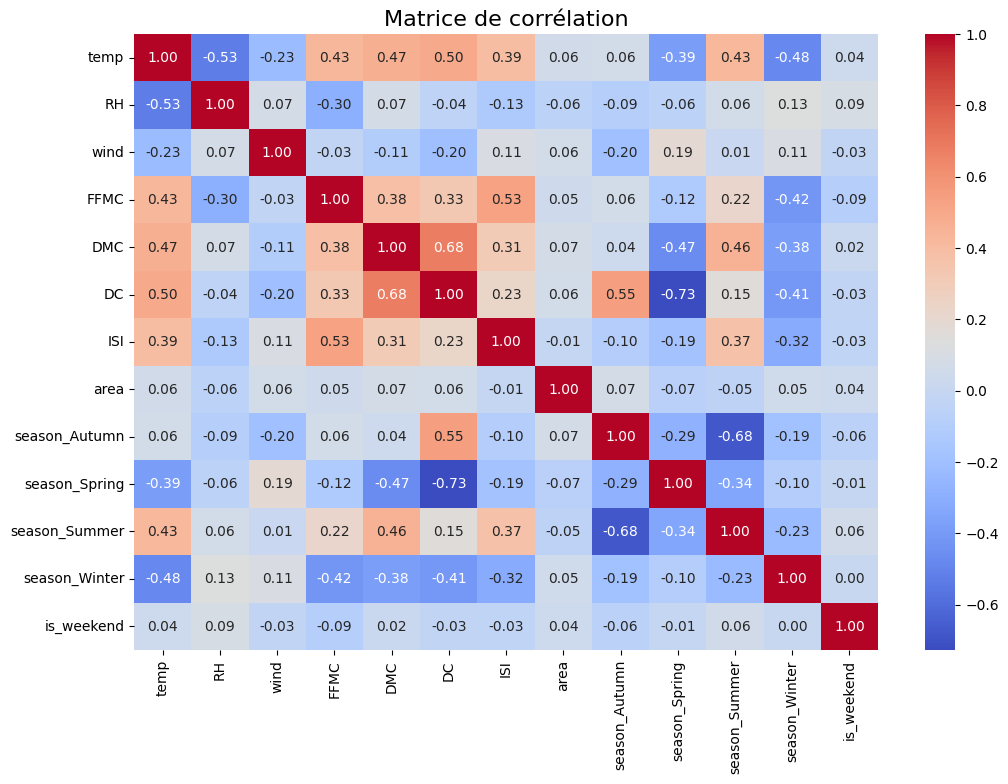

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_robust = df_scaled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_robust, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation", fontsize=16)
plt.show()


avec spearmanr

In [228]:
from scipy.stats import spearmanr, kendalltau

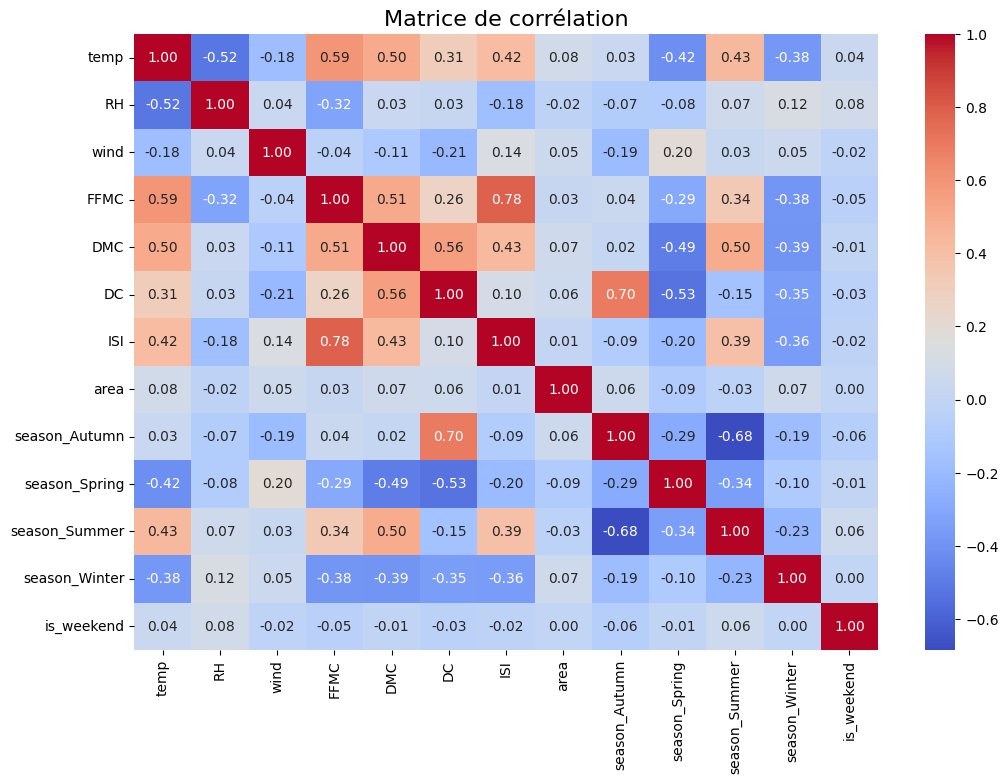

In [229]:
spearman_corr_matrix = df_scaled.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation", fontsize=16)
plt.show()


avec Kendall

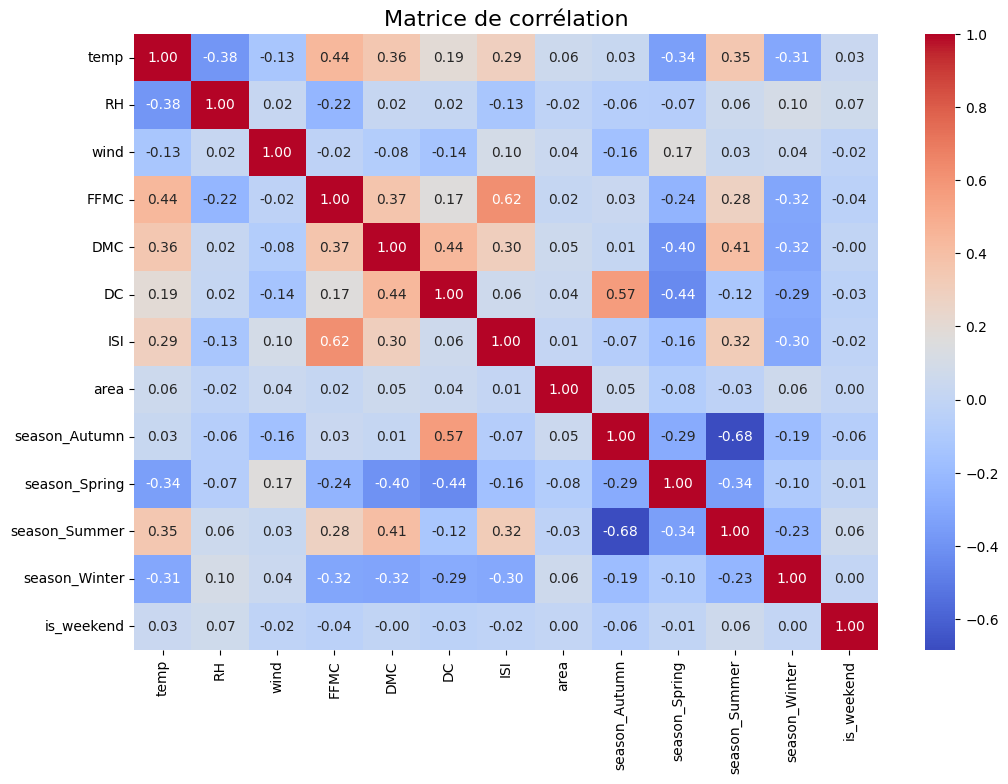

In [230]:
kendall_corr_matrix = df_scaled.corr(method='kendall')

plt.figure(figsize=(12, 8))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation", fontsize=16)
plt.show()


Application de PCA pour régler le problème de corrélation

In [231]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = df_scaled  # ou df_scaled.values

pca = PCA()  # par défaut, garde toutes les composantes
X_pca = pca.fit_transform(X)


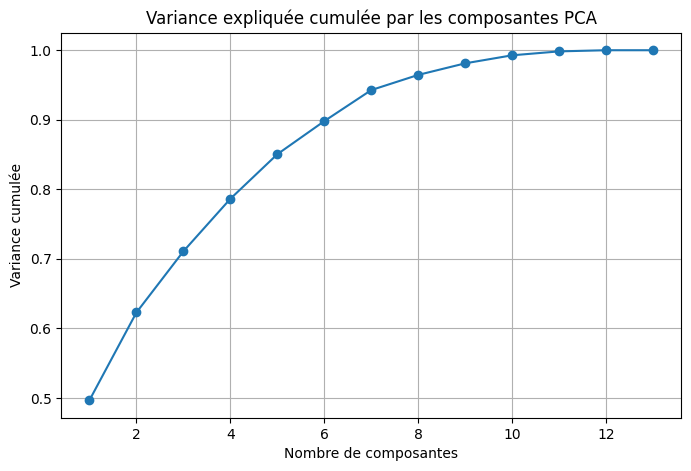

✅ Nombre optimal de composantes pour 80% de variance : 5


In [232]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.title("Variance expliquée cumulée par les composantes PCA")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée")
plt.grid(True)
plt.show()

# Tu peux choisir le nombre de composantes pour atteindre ~80% de variance
n_comp = np.argmax(cum_var >= 0.80) + 1
print(f"✅ Nombre optimal de composantes pour 80% de variance : {n_comp}")

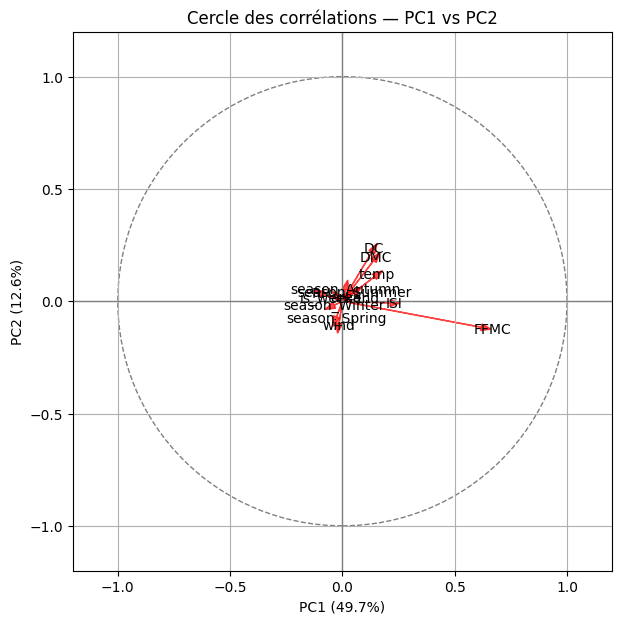

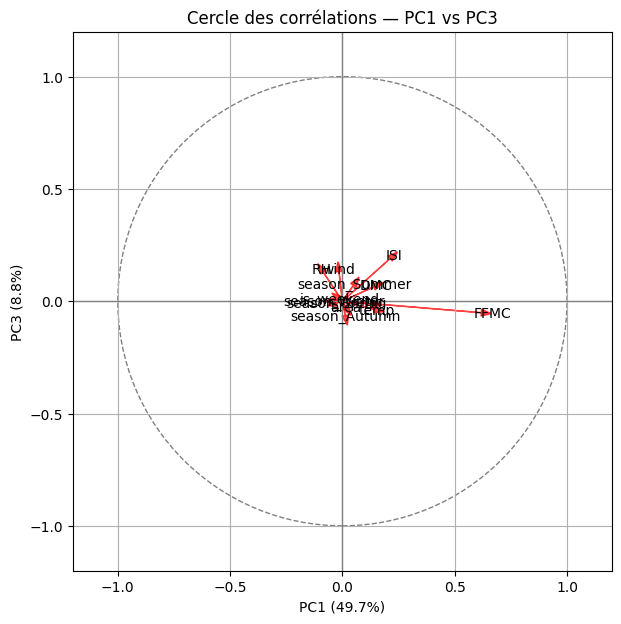

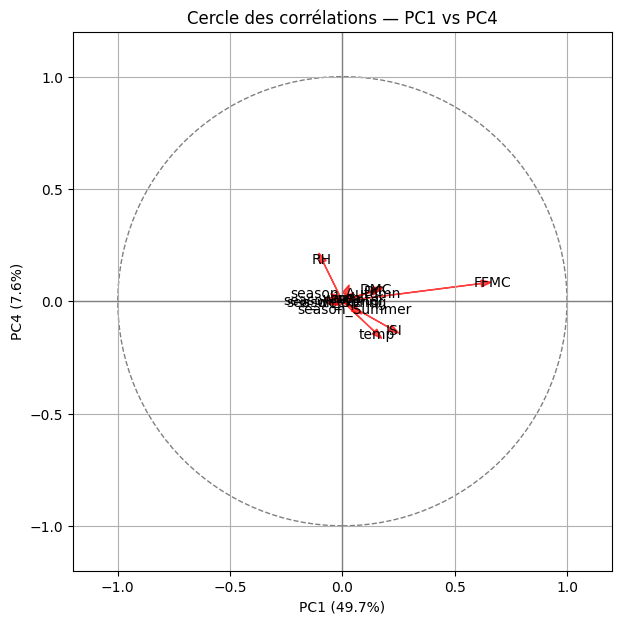

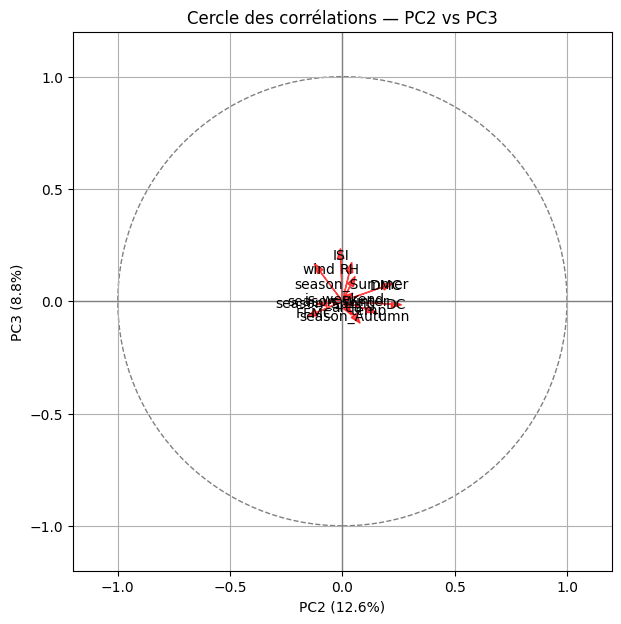

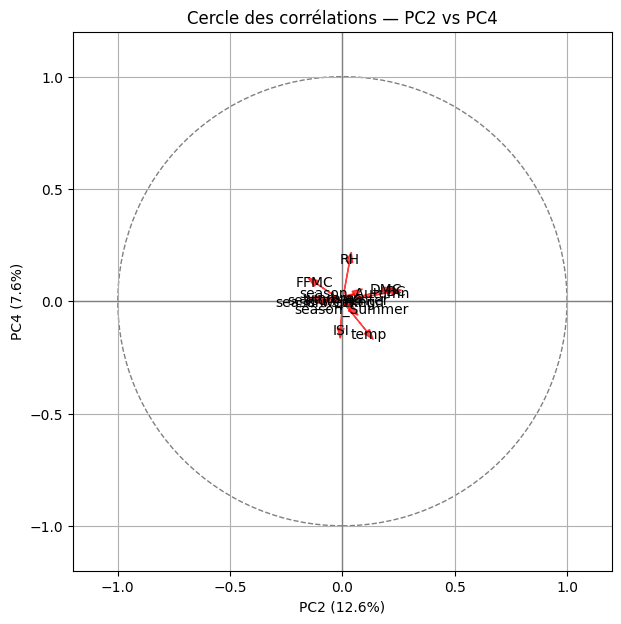

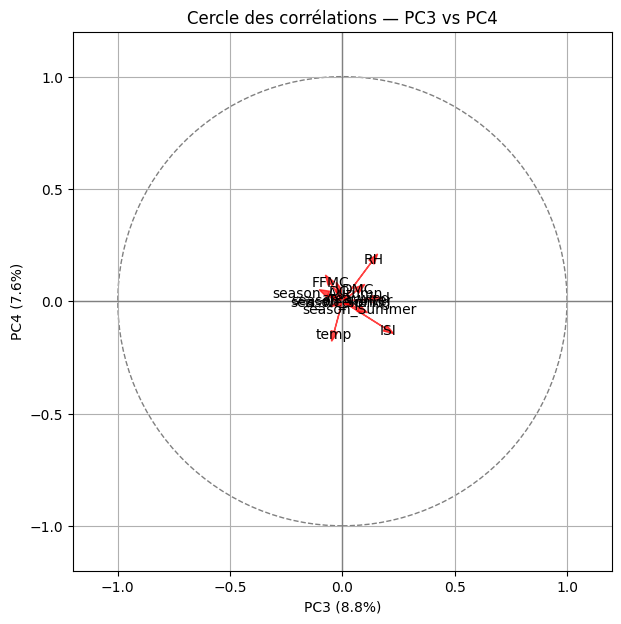

In [233]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_final_4 = PCA(n_components=4)
X_pca_final_4 = pca_final_4.fit_transform(X)

features = ['temp','RH','wind','FFMC','DMC','DC','ISI','area','season_Autumn','season_Spring','season_Summer','season_Winter','is_weekend']

# ✅ Corrélations entre variables et composantes principales
corvar = pca_final_4.components_.T * np.sqrt(pca_final_4.explained_variance_ratio_)

# ✅ Fonction d’affichage
def plot_correlation_circle(corvar, features, pca, ax1=0, ax2=1, radius=1):
    fig, ax = plt.subplots(figsize=(7,7))

    # cercle unité
    circle = plt.Circle((0,0), radius, color='grey', fill=False, linestyle='--')
    ax.add_artist(circle)

    # flèches (vecteurs)
    for i, (x, y) in enumerate(zip(corvar[:, ax1], corvar[:, ax2])):
        ax.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.03)
        ax.text(x*1.08, y*1.08, features[i], color='black',
                ha='center', va='center', fontsize=10)

    # axes et style
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.set_xlabel(f"PC{ax1+1} ({pca.explained_variance_ratio_[ax1]*100:.1f}%)")
    ax.set_ylabel(f"PC{ax2+1} ({pca.explained_variance_ratio_[ax2]*100:.1f}%)")
    ax.set_title(f"Cercle des corrélations — PC{ax1+1} vs PC{ax2+1}")
    ax.set_xlim(-radius*1.2, radius*1.2)
    ax.set_ylim(-radius*1.2, radius*1.2)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    plt.show()

# ✅ Boucle automatique sur les combinaisons d’axes (PC1–PC2, PC1–PC3, etc.)
pairs = list(itertools.combinations(range(pca_final_4.n_components), 2))

for (i, j) in pairs:
    plot_correlation_circle(corvar, features, pca_final_4, ax1=i, ax2=j)


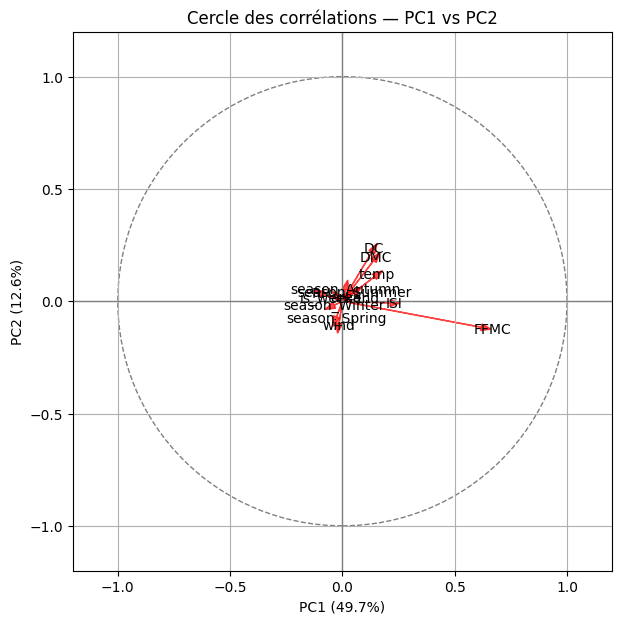

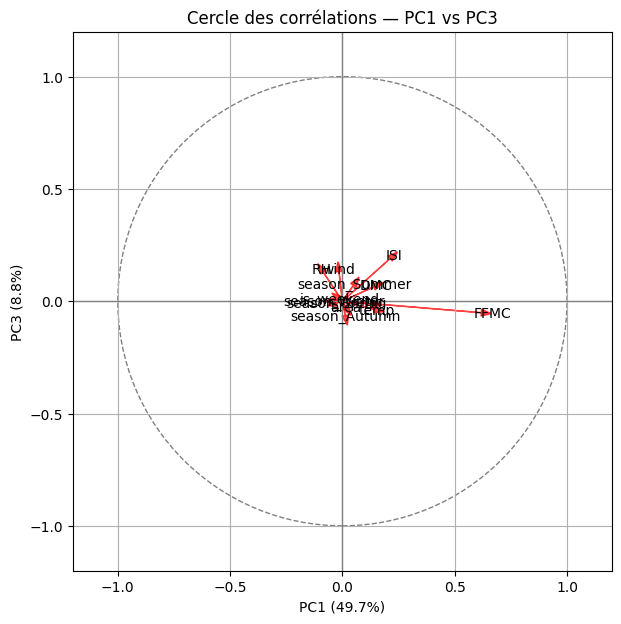

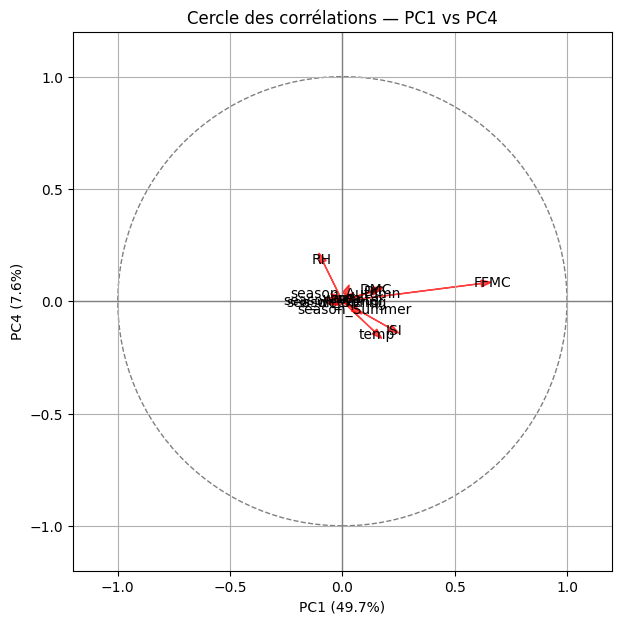

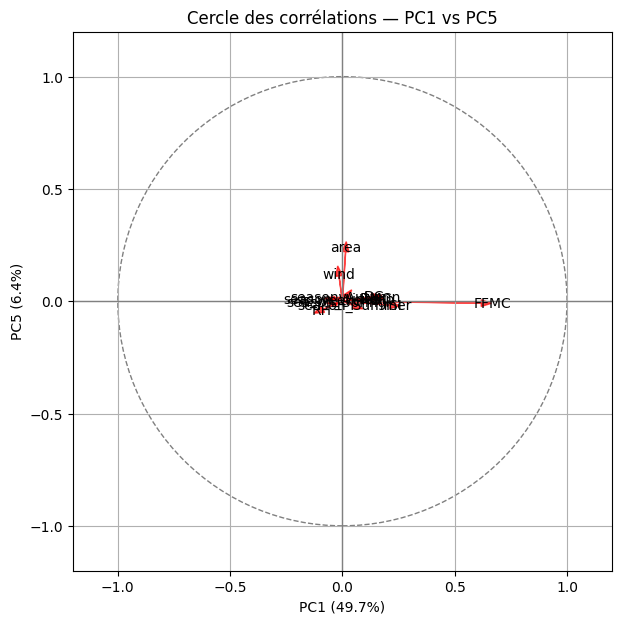

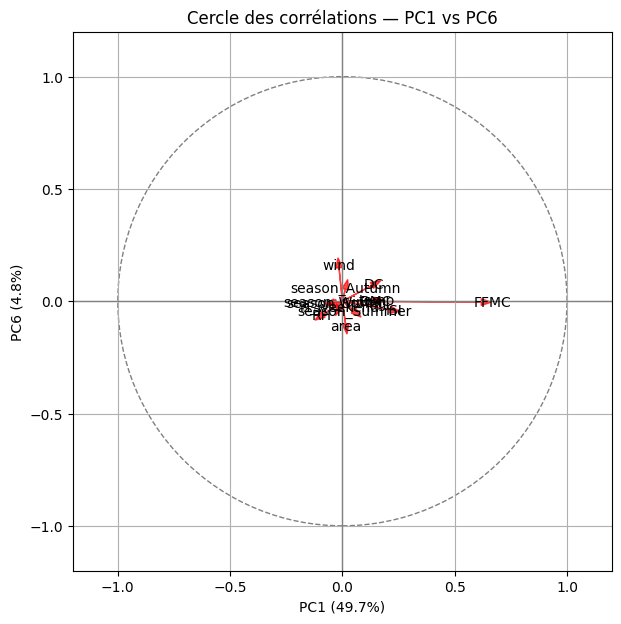

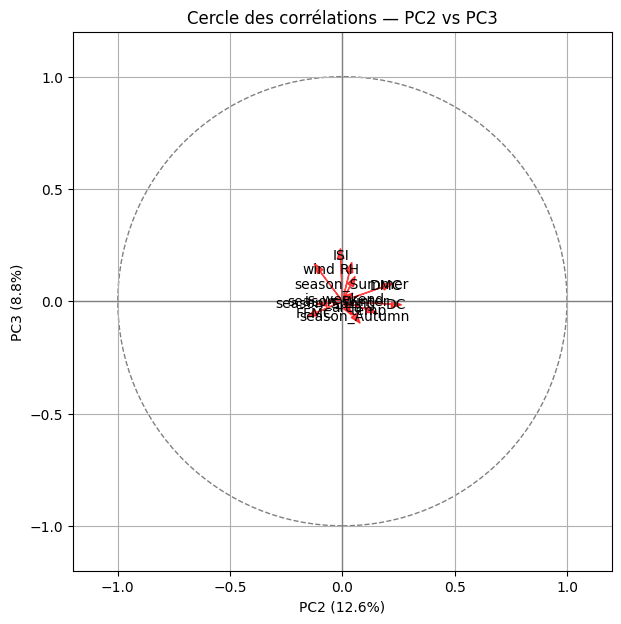

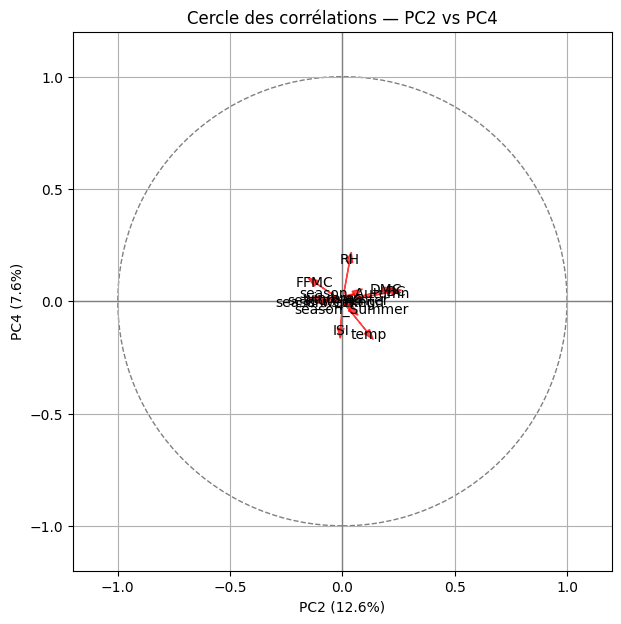

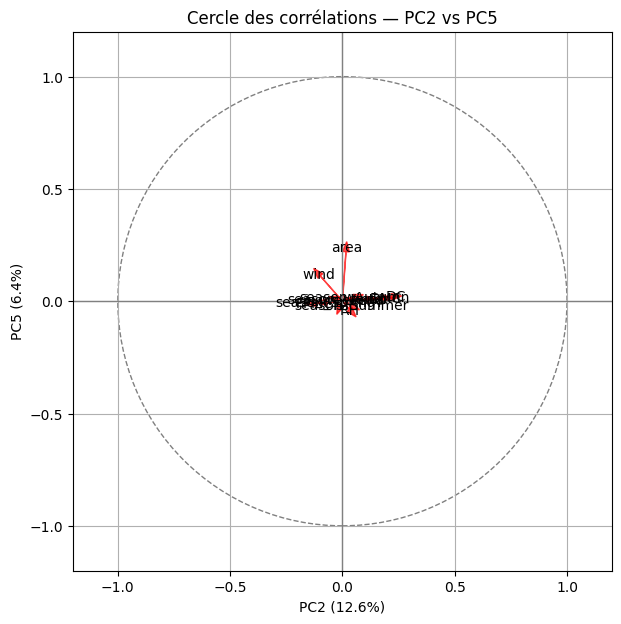

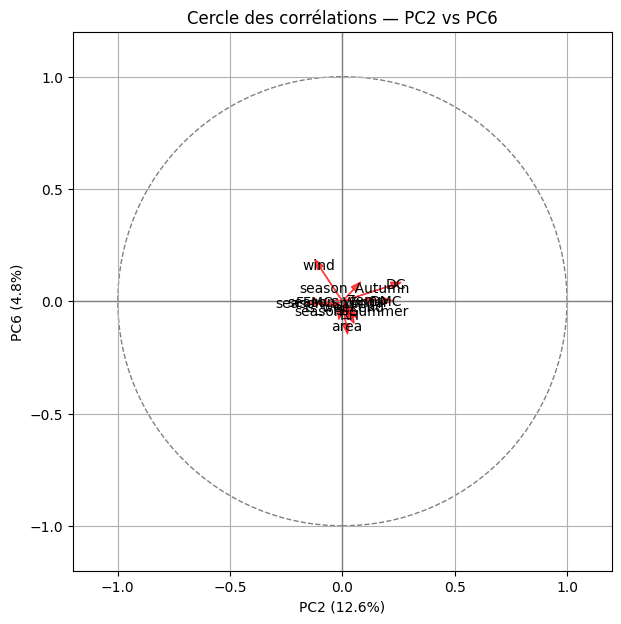

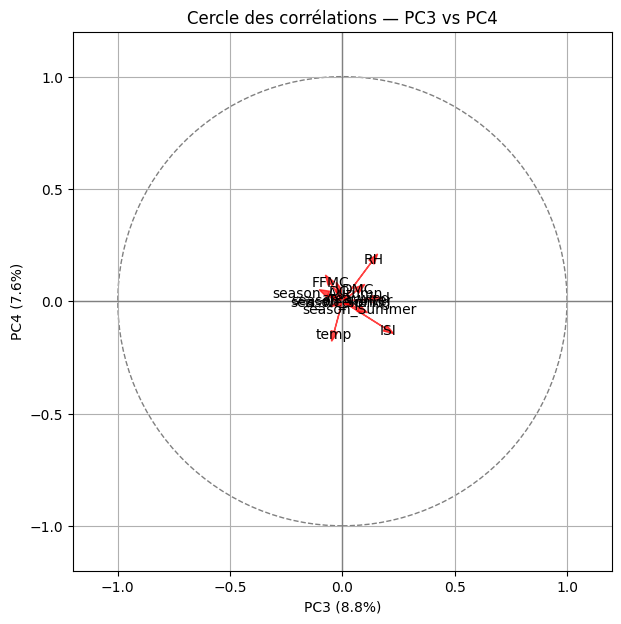

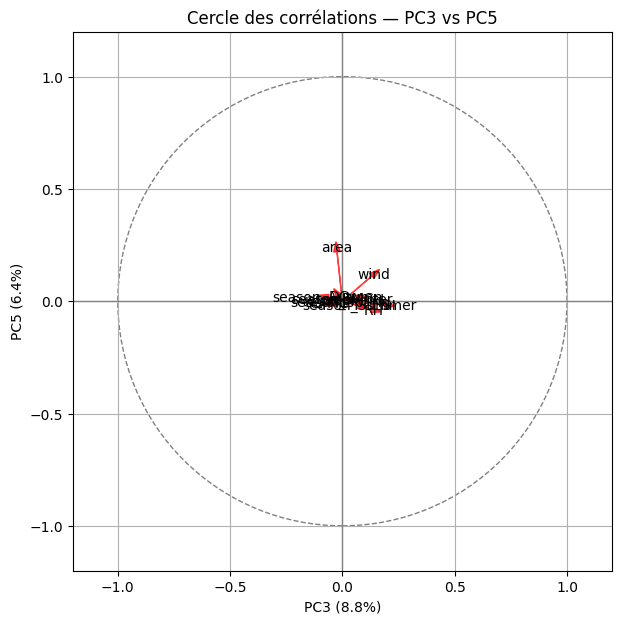

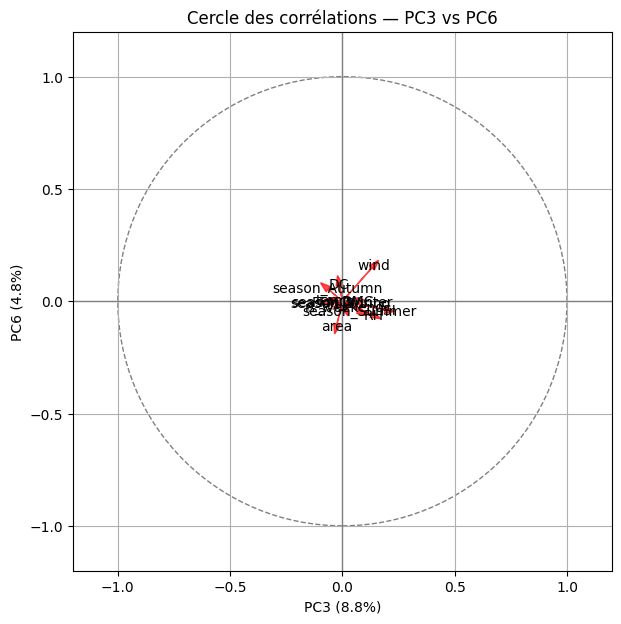

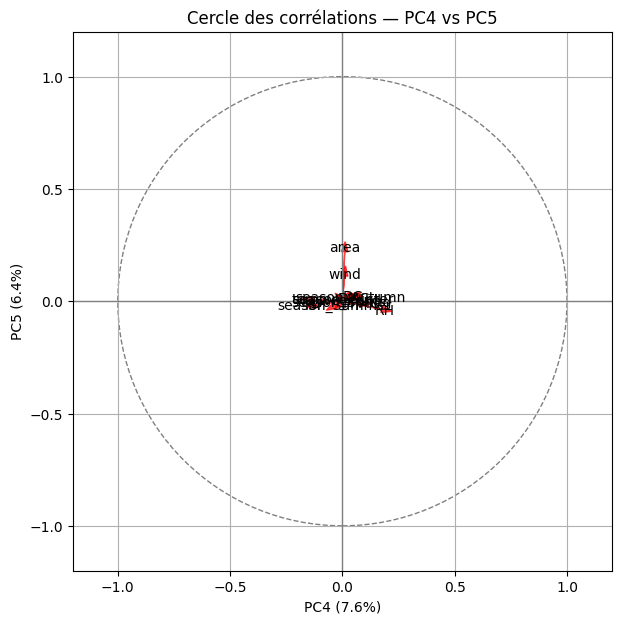

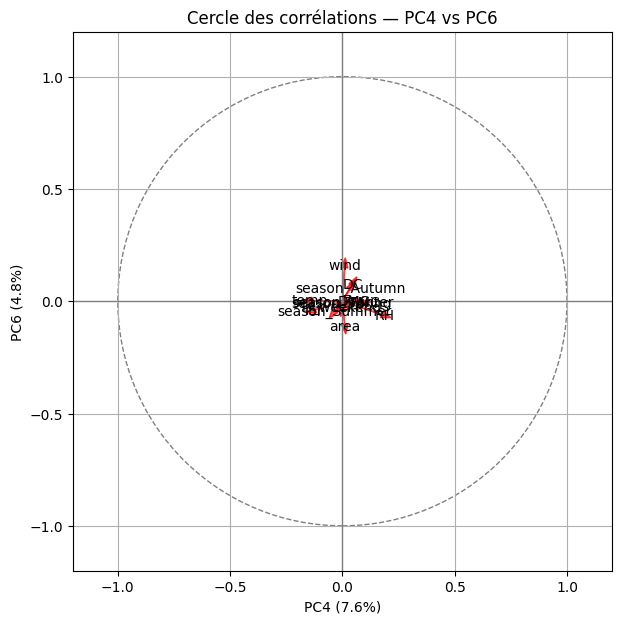

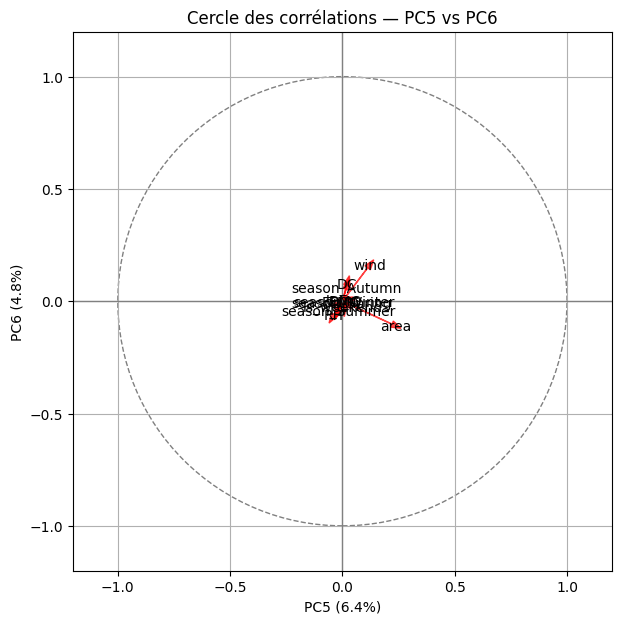

In [234]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_final_6 = PCA(n_components=6)
X_pca_final_6 = pca_final_6.fit_transform(X)



# ✅ Variables
features = ['temp','RH','wind','FFMC','DMC','DC','ISI','area','season_Autumn','season_Spring','season_Summer','season_Winter','is_weekend']

# ✅ Corrélations entre variables et composantes principales
corvar = pca_final_6.components_.T * np.sqrt(pca_final_6.explained_variance_ratio_)

# ✅ Boucle automatique sur les combinaisons d’axes (PC1–PC2, PC1–PC3, etc.)
pairs = list(itertools.combinations(range(pca_final_6.n_components), 2))

for (i, j) in pairs:
    plot_correlation_circle(corvar, features, pca_final_6, ax1=i, ax2=j)


Choix d'algorithme et le nombre K

___________________ algo GMM


🎯 PCA avec 2 composantes
  ⏳ Covariance type: full
  ⏳ Covariance type: tied
  ⏳ Covariance type: diag
  ⏳ Covariance type: spherical

🎯 PCA avec 3 composantes
  ⏳ Covariance type: full
  ⏳ Covariance type: tied
  ⏳ Covariance type: diag
  ⏳ Covariance type: spherical

🎯 PCA avec 4 composantes
  ⏳ Covariance type: full
  ⏳ Covariance type: tied
  ⏳ Covariance type: diag
  ⏳ Covariance type: spherical

🎯 PCA avec 5 composantes
  ⏳ Covariance type: full
  ⏳ Covariance type: tied
  ⏳ Covariance type: diag
  ⏳ Covariance type: spherical

🎯 PCA avec 6 composantes
  ⏳ Covariance type: full
  ⏳ Covariance type: tied
  ⏳ Covariance type: diag
  ⏳ Covariance type: spherical

📋 Aperçu des résultats :
   PCA_components covariance_type  k          AIC          BIC  Silhouette
0               2            full  2  3233.840440  3280.568911    0.597364
1               2            full  3  3045.620404  3117.837132    0.588118
2               2            full  4  3039.806151  3137.511138    0.586298

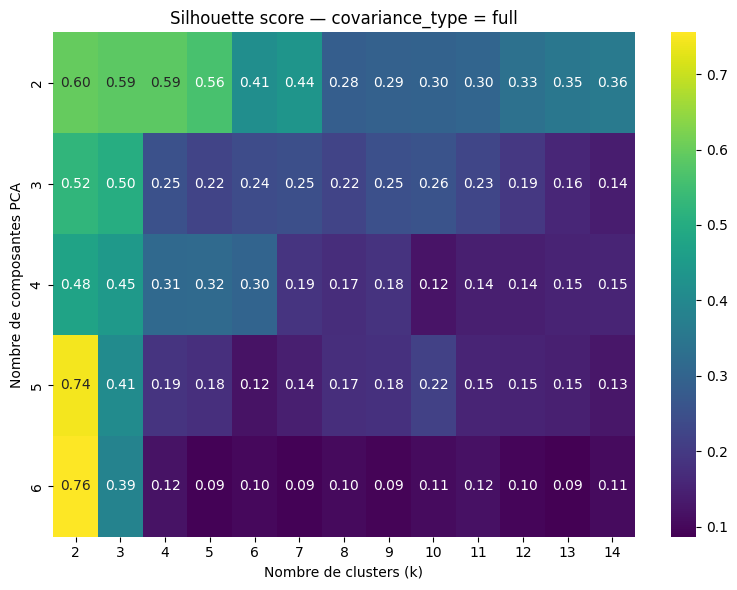

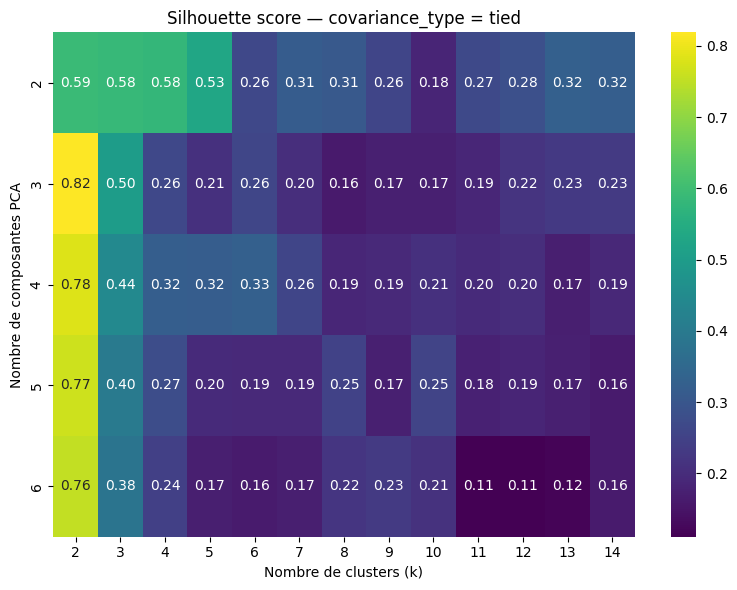

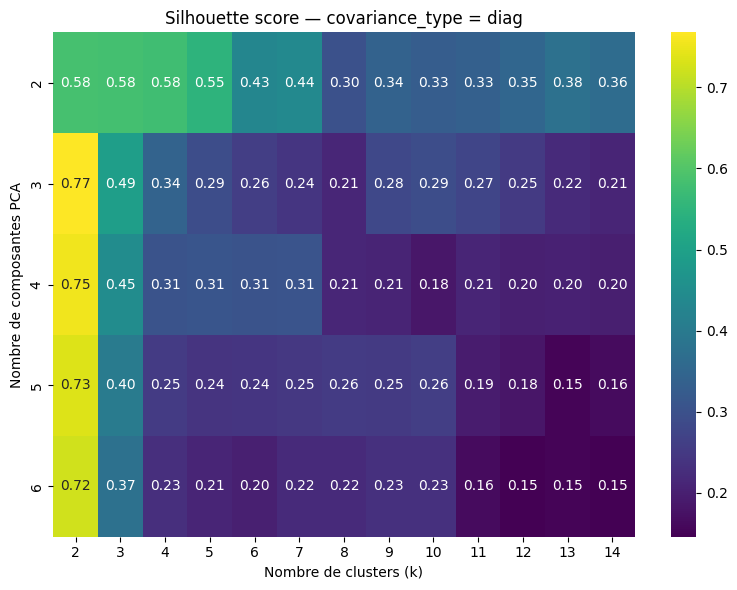

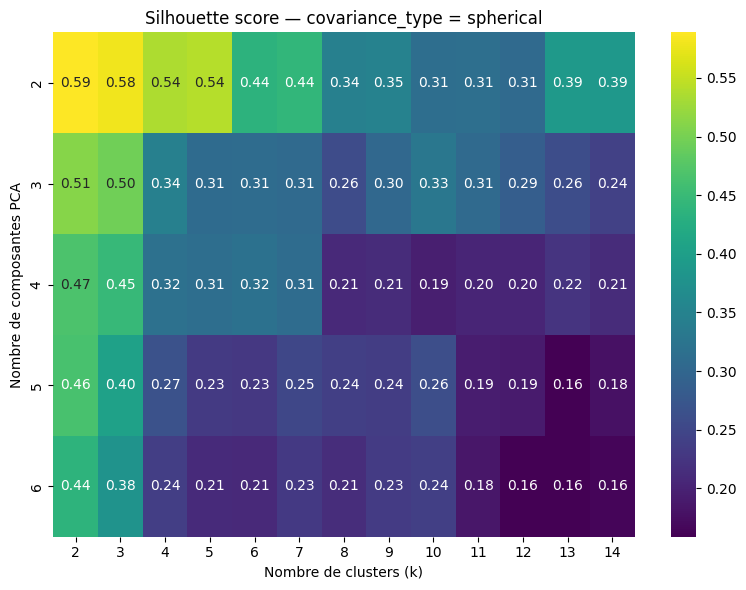

In [235]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_copy = df_scaled

# --- Paramètres ---
pca_components = range(2, 7)       # nombre de composantes PCA à tester (2 à 6)
K = range(2, 15)                   # nombre de clusters à tester (2 à 14)
covariance_types = ['full', 'tied', 'diag', 'spherical']  # tous les types de covariance

results = []

# --- Boucle principale ---
for n_comp in pca_components:
    print(f"\n🎯 PCA avec {n_comp} composantes")
    pca_ = PCA(n_components=n_comp, random_state=42)
    X_pca_ = pca_.fit_transform(df_copy)

    for cov in covariance_types:
        print(f"  ⏳ Covariance type: {cov}")
        for k in K:
            try:
                gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=42)
                gmm.fit(X_pca_)
                labels = gmm.predict(X_pca_)

                # Score de silhouette
                sil_score = silhouette_score(X_pca_, labels)

                results.append({
                    'PCA_components': n_comp,
                    'covariance_type': cov,
                    'k': k,
                    'AIC': gmm.aic(X_pca_),
                    'BIC': gmm.bic(X_pca_),
                    'Silhouette': sil_score
                })
            except Exception as e:
                print(f"⚠️ Erreur pour PCA={n_comp}, cov={cov}, k={k} → {e}")

# --- Résultats ---
df_metrics = pd.DataFrame(results)
print("\n📋 Aperçu des résultats :")
print(df_metrics.head())

# --- Meilleur modèle selon Silhouette ---
best_row = df_metrics.loc[df_metrics['Silhouette'].idxmax()]
print(f"\n✅ Meilleur score global :")
print(f"PCA = {best_row['PCA_components']} | k = {int(best_row['k'])} | "
      f"Covariance = {best_row['covariance_type']} | "
      f"Silhouette = {best_row['Silhouette']:.4f}")

# --- Heatmaps comparatives ---
for cov in covariance_types:
    subset = df_metrics[df_metrics['covariance_type'] == cov]
    plt.figure(figsize=(8, 6))
    pivot_sil = subset.pivot(index='PCA_components', columns='k', values='Silhouette')
    sns.heatmap(pivot_sil, annot=True, fmt=".2f", cmap='viridis')
    plt.title(f"Silhouette score — covariance_type = {cov}")
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Nombre de composantes PCA")
    plt.tight_layout()
    plt.show()
